# The archive

When you fit a brush estimator, three new attributes are created: `best_estimator_`, `population_`, and `archive_`.

Brush will store the pareto front using validation loss as a list in `archive_`. This pareto front is always created with individuals from the final population that are not dominated in objectives **scorer** and **complexity**. Setting `scorer` as an objective means optimizing the metric set as `scorer: str`.

In case you need more flexibility, the `population_` will contain the entire final population, and you can iterate through this list to select individuals with different criteria. It is also good to remind that Brush supports different optimization objectives using the argument `objectives`.

Each element from the archive is a Brush individual that can be serialized (JSON object).

In [1]:
import pandas as pd
from pybrush import BrushClassifier

# load data
df = pd.read_csv('../examples/datasets/d_analcatdata_aids.csv')
X = df.drop(columns='target')
y = df['target']

In [2]:
est = BrushClassifier(
    functions=['SplitBest','Add','Mul','Sin','Cos','Exp','Logabs'],
    objectives=["scorer", "linear_complexity"],
    scorer='balanced_accuracy', # brush implements several metrics for clf and reg!
    max_gens=100,
    pop_size=100,
    max_depth=10,
    max_size=100,
    verbosity=2,
)

est.fit(X, y)

print("Best model:", est.best_estimator_.get_model())
print('score:', est.score(X,y))

Generation 1/100 [/                                                 ]
Best model on Val:Logistic(Sum(-0.32,If(AIDS>=16068.00,If(AIDS>=20712.00,1.00*Add(1.00,AIDS),1.00*Mul(1.00,AIDS)),If(Total>=1601948.00,1.00*Mul(20712.00*AIDS,AIDS),If(AIDS>=258.00,AIDS,-0.32)))))
Train Loss (Med): 0.77500 (0.56250)
Val Loss (Med): 0.70000 (0.50000)
Median Size (Max): 7 (95)
Median complexity (Max): 992 (921596320)
Time (s): 0.10080

Generation 2/100 [//                                                ]
Best model on Val:Logistic(Sum(-8.68,0.52*AIDS))
Train Loss (Med): 0.77500 (0.52500)
Val Loss (Med): 0.70000 (0.50000)
Median Size (Max): 7 (98)
Median complexity (Max): 176 (1657696672)
Time (s): 0.14870

Generation 3/100 [//                                                ]
Best model on Val:Logistic(Sum(-8.68,0.52*AIDS))
Train Loss (Med): 0.77500 (0.52500)
Val Loss (Med): 0.70000 (0.50000)
Median Size (Max): 5 (93)
Median complexity (Max): 176 (1304140832)
Time (s): 0.19549

Generation 4/100 [///     

You can see individuals from archive using the index:

In [3]:
print(len(est.archive_))

print( est.archive_[-1].get_model() )

2
Logistic(Sum(-11.58,AIDS))


And you can call `predict` (or `predict_proba`, if your `est` is an instance of `BrushClassifier`) with individuals from the archive or population. But first you need to wrap the data in a Brush dataset to make feature names match:

In [4]:
from pybrush import Dataset

data = Dataset(X=X, ref_dataset=est.data_, 
               feature_names=est.feature_names_)

est.archive_[-1].predict(data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True])

In [5]:
est.archive_[-1].predict_proba(data)

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       9.9999940e-01, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       3.7768183e-03, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.8871395e-04, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 9.1870719e-01], dtype=float32)

## Loading a specific model from archive

Use it as if it is a compatible sklearn estimator!

In [6]:
ind_from_arch = est.archive_[-1]

In [7]:
print(ind_from_arch.get_model())
print(ind_from_arch.fitness)

Logistic(Sum(-11.58,AIDS))
Fitness(0.600000 16.000000 )


To use this loaded model to do predictions, you need to wrap the data into a Dataset:

In [8]:
from pybrush import Dataset

data = Dataset(X=X, ref_dataset=est.data_, 
               feature_names=est.feature_names_)
ind_from_arch.predict(data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True])

In [9]:
ind_from_arch.predict(data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True])

## Visualizing the Pareto front of the archive

2


Text(0, 0.5, 'Complexity (smaller is better)')

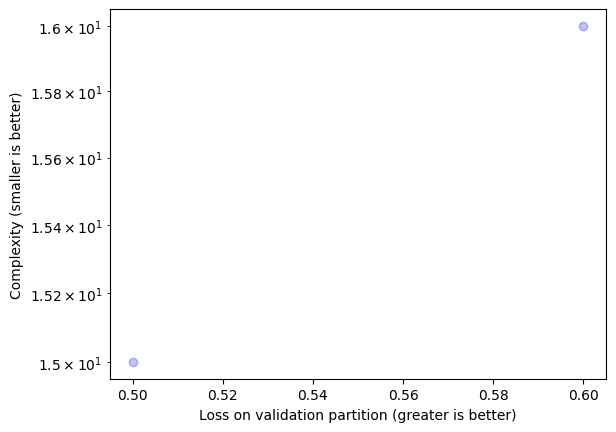

In [10]:
import matplotlib.pyplot as plt

xs, ys = [], []
for ind in est.archive_:
    xs.append(ind.fitness.loss_v)
    ys.append(ind.fitness.linear_complexity)

print(len(xs))
plt.scatter(xs, ys, alpha=0.25, c='b', linewidth=1.0)
plt.yscale('log')
plt.xlabel("Loss on validation partition (greater is better)")
plt.ylabel("Complexity (smaller is better)")

## Acessing the entire population (unique individuals)

In [11]:
est = BrushClassifier(
    # functions=['SplitBest','Add','Mul','Sin','Cos','Exp','Logabs'],
    objectives=["scorer", "linear_complexity"],
    max_depth=5,
    max_size=75,
    max_gens=100,
    pop_size=200,
    verbosity=1
)

est.fit(X,y)

print("Best model:", est.best_estimator_.get_model())
print('score:', est.score(X,y))

Completed 100% [====================]
Best model: Logistic(Sum(-0.91,0.04*Max(0.39*AIDS,0.43*AIDS,0.43*AIDS,0.52*AIDS)))
score: 0.54


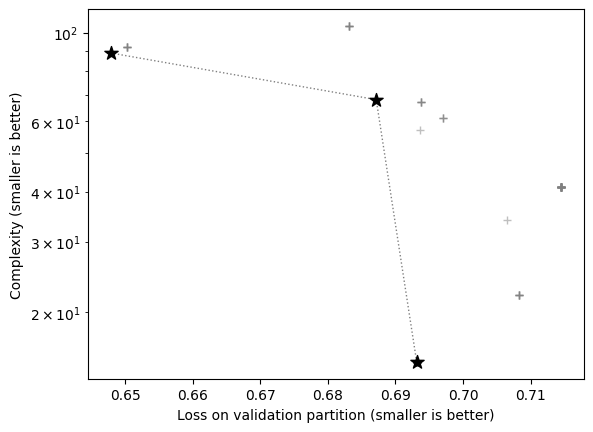

In [12]:
plt.figure()

xs, ys = [], []
for ind in est.population_:
    # use the same as the objectives
    xs.append(ind.fitness.loss_v)
    ys.append(ind.fitness.linear_complexity)
plt.scatter(xs, ys, alpha=0.5, c='gray', marker='+', linewidth=1.0)

xs, ys = [], []
for ind in est.archive_:
    xs.append(ind.fitness.loss_v)
    ys.append(ind.fitness.linear_complexity)
plt.scatter(xs, ys, alpha=1.0, c='k', marker='*', s=100, linewidth=1.0)
plt.plot(xs, ys, alpha=0.5, c='k', ls=':', linewidth=1.0)

plt.yscale('log')
plt.xlabel("Loss on validation partition (smaller is better)")
plt.ylabel("Complexity (smaller is better)")
plt.show()